<a href="https://colab.research.google.com/github/XeyaleVeliyeva/Machine-learning/blob/main/student_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r'C:\Users\compo1022\Desktop\DS-128\ML-128\logistic regression\student_performance_prediction - Copy.csv')
df

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No


In [ ]:
df.isna().sum()

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [ ]:
df['Passed'].unique()

array(['Yes', 'No', nan], dtype=object)

In [ ]:
df = df.drop(["Student ID",
              "Participation in Extracurricular Activities",
              "Parent Education Level"], axis=1)

In [ ]:
import numpy as np
df['Attendance Rate'] = df['Attendance Rate'].fillna(df['Attendance Rate'].median())
df['Study Hours per Week'] = df['Study Hours per Week'].fillna(df['Study Hours per Week'].median())
df['Previous Grades'] = df['Previous Grades'].fillna(df['Previous Grades'].median())


In [ ]:
median = df['Previous Grades'].median()

df['Passed'] = df['Passed'].fillna('No')
df.loc[df['Previous Grades'] >= median, 'Passed'] = 'Yes'


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Passed'] = le.fit_transform(df['Passed'])



In [ ]:
# from scipy.stats import zscore
# import numpy as np
# num_cols = df.select_dtypes(include=np.number).columns
# for cols in num_cols:
#     z_scores = np.abs(zscore(df[cols]))
#     outliers = df[z_scores > 3]
#     print(cols, ":", len(outliers), "outliers")


In [ ]:
# df_clean =df[(np.abs(zscore(df[num_cols])) < 3).all(axis=1)]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

<Axes: >

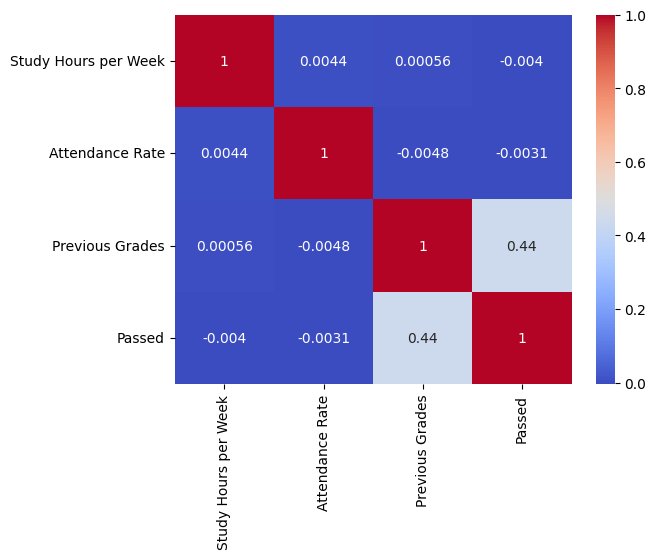

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:
X = df.drop('Passed',axis=1)
y = df['Passed']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
ln = LogisticRegression()
ln.fit(X_train,y_train)
ln.score(X_test,y_test)

0.7555

ROC-AUC: 0.8512455457216899


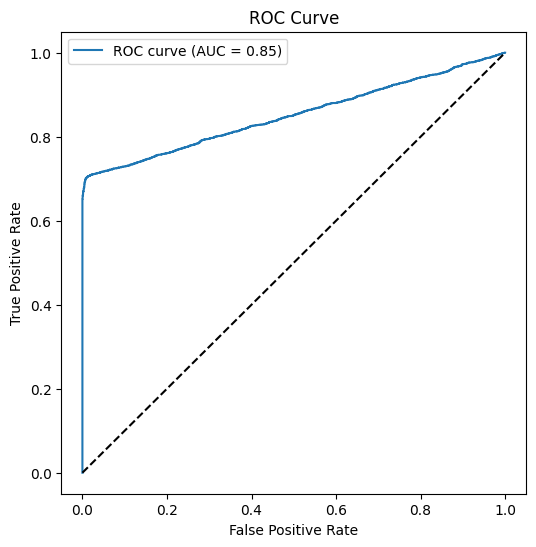

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_probs = ln.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
